In [9]:
import re
import pandas as pd

# Read the HTML file
with open('liked_posts.html', 'r', encoding='utf-8') as file:
    data = file.read()

# Regular expressions to extract the data
pattern = re.compile(r'<div class="_3-95 _2pim _a6-h _a6-i">(.*?)</div>.*?href="(https://www\.instagram\.com/[^"]+)">👍</a></div><div>(.*?)</div>', re.DOTALL)

# Extract matches
matches = pattern.findall(data)

# Parse matches into a structured list
parsed_data = [{"Username": match[0], "Post URL": match[1], "Date and Time": match[2]} for match in matches]

# Convert to a DataFrame
df = pd.DataFrame(parsed_data)

# Save to CSV
df.to_csv("liked_posts.csv", index=False)


Original: en, Hashed: 49c6c38a6eeb77a4ac4cd30a4df011b19130709b92be46cc2a30a4bb30246f6d
Original: ko, Hashed: 44a1dd1175431619ddc2d056eeffec3db62af04119d20d8fe37a2b6b023e6d9d
Original: in, Hashed: d3e3a41f518e52e63c71c0566bc9d5576e6ccd1a241bec323dab489115ab8a6e
Original: me, Hashed: cf81eeb74ce9236ba7ae991ec50178fbe9a61389a73cf0a482ccb2feb13e35ed
Original: ko, Hashed: 0b80b868f48198a4cf26d20ab74b6db4364a9033da2f28f6e62332c94717ac2c
Original: sa, Hashed: f7f2a6608dc174d52ea8dbe837203cacce84cd2758f0997744931b0576f234d3
Original: so, Hashed: e111f0208078837304b73eb504c02cc5a372da36a0582ee5c985d1cb2e1b5907
Original: me, Hashed: 46a6c8cffed906783fc487dca0d0843f6f42c143aac168702cf7550312abfc63
Original: il, Hashed: b8efbb7aeb1ffd8c4bef3fdab343ec68609a2518615c323f37e90b54af6fa318
Original: si, Hashed: 39e676401631128c9ffb4a674847217c2dff7c5afef1d4b9e934d5146d6d1805


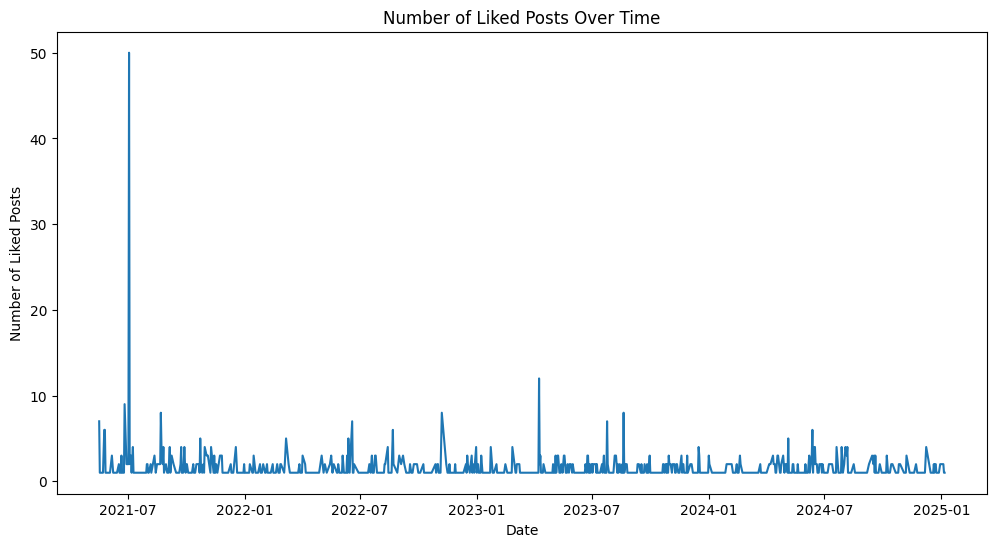

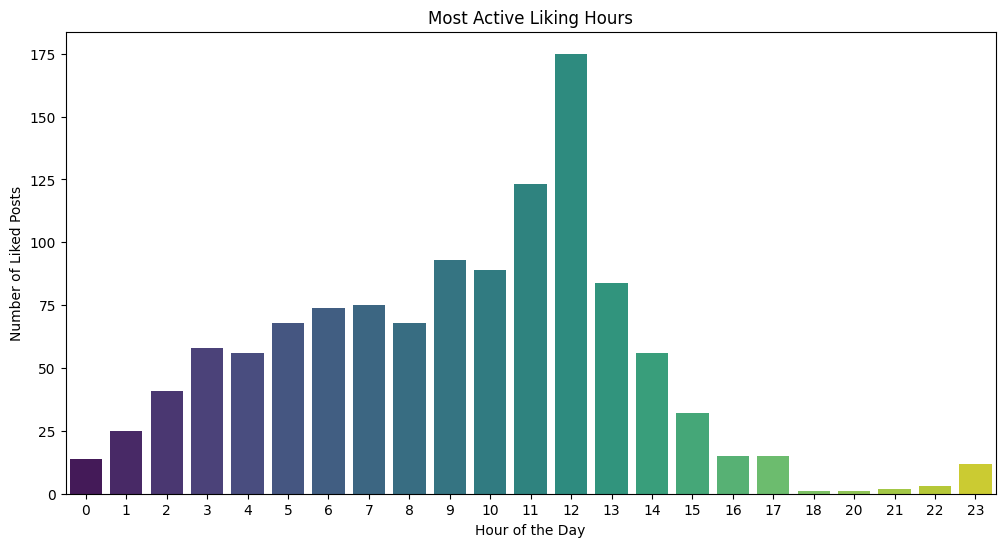

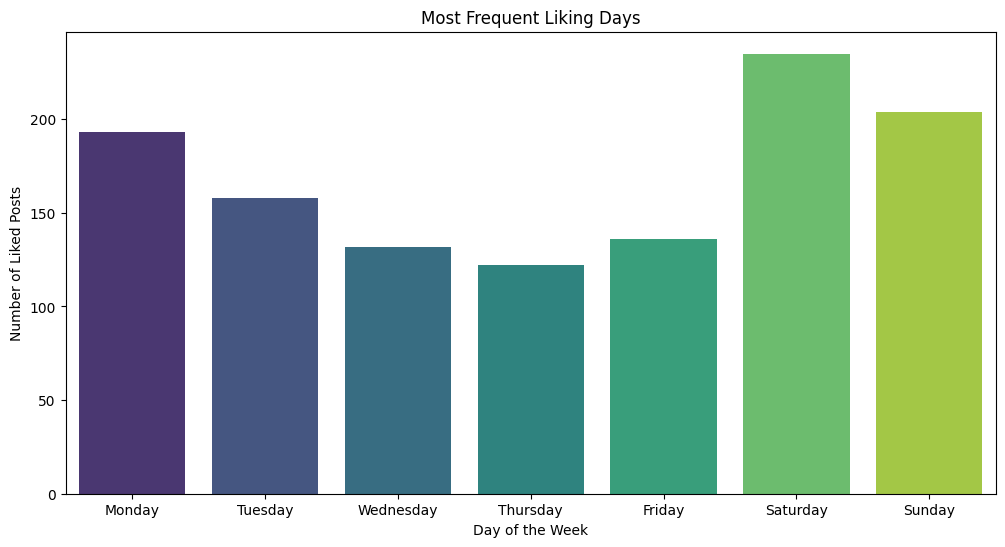

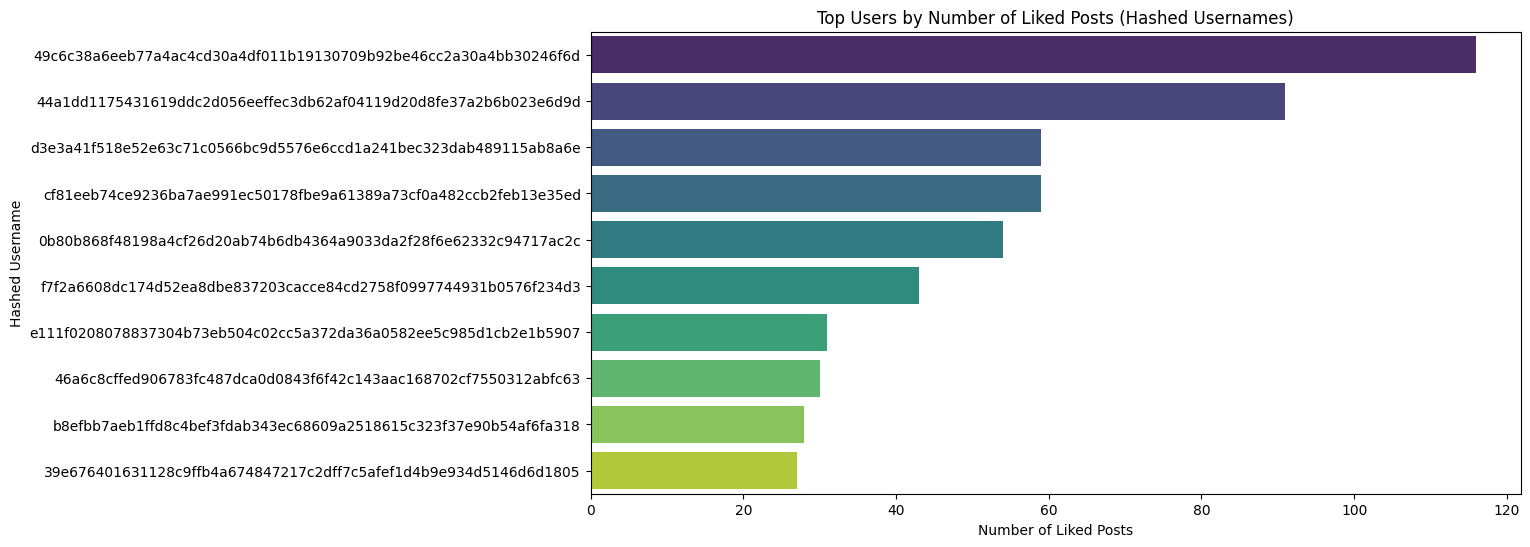

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import hashlib

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('liked_posts.csv')

# Parse the 'Date and Time' column with the correct format
data['Date and Time'] = pd.to_datetime(data['Date and Time'], format='%b %d, %Y %I:%M %p')

# Extract date and time components
data['Date'] = data['Date and Time'].dt.date
data['Time'] = data['Date and Time'].dt.time
data['Hour'] = data['Date and Time'].dt.hour
data['Day'] = data['Date and Time'].dt.day_name()

# Find the top 10 most liked usernames
top_users = data['Username'].value_counts().head(10)

# Hash the usernames using SHA-256
hashed_usernames = top_users.index.map(lambda x: hashlib.sha256(x.encode()).hexdigest())

# Print the hashed usernames
for original, hashed in zip(top_users.index, hashed_usernames):
    print(f"Original: {original[:2]}, Hashed: {hashed}")

# Plot number of liked posts over time
plt.figure(figsize=(12, 6))
data['Date'].value_counts().sort_index().plot()
plt.title('Number of Liked Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Liked Posts')
plt.show()

# Plot most active liking hours
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=data, palette='viridis')
plt.title('Most Active Liking Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Liked Posts')
plt.show()

# Plot most frequent liking days
plt.figure(figsize=(12, 6))
sns.countplot(x='Day', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Most Frequent Liking Days')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Liked Posts')
plt.show()

# Plot top users by number of liked posts with hashed usernames
plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.values, y=hashed_usernames, palette='viridis')
plt.title('Top Users by Number of Liked Posts (Hashed Usernames)')
plt.xlabel('Number of Liked Posts')
plt.ylabel('Hashed Username')
plt.show()